In [1]:
import arrow
print 'Last update: %s ' % arrow.now().format('YYYY-MM-DD')

Last update: 2019-08-04 


# Frequency analysis
This notebook want to present the frequency analysis of a signal

In [2]:
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Functions

In [3]:
def compute_signal(A, f, t, phi):
    """
    Compute a sin wave signal

    Parameters
    ----------
    A: float/int
        Amplitud
    f: float/int
        frequency
    t: np.array
        time intervals
    phi: float/int
        phase of the signal

    Returns
    -------
    np.array
    """
    return A * np.sin(2 * np.pi * f * t + phi)


def compute_time_axis(fs, max_time=2):
    """
    Compute time axis of a sampled signal
    
    Parameters
    ----------
    fs: float/int
        sampling frequency
    max_time: int
        max time of the signal

    Returns
    -------
    np.array:
        timestamps of the sampled signal
    """
    ts = 1 / float(fs)
    return np.arange(0, max_time, ts)




# Frequency Analysis
Frequency analysis of a signal involve the resolution of the signal into his frequency (sinuzoidal) components. It is known that any periodic signal $f(t)$ can be writen as:

$$f(n)=a_0 + \sum_{n=1}^{\infty}{a_n cos(nwt)} + \sum_{n=1}^{\infty}{b_n sin(nwt)}$$

where $w=2 \pi T_s$ and $T_s$ is the sampling period. Coeficients $a$ and $b$ of this series can be written as: 

$$a_0 = \frac{1}{T_s} \int_{-T_s/2}^{T_s/2} f(t) dt $$

$$a_n = \frac{2}{T_s} \int_{-T_s/2}^{T_s/2} f(t) cos(nwt) dt $$

$$b_n = \frac{2}{T_s} \int_{-T_s/2}^{T_s/2} f(t) sin(nwt) dt $$

We can rewrite the previous equations as:

$$f(n)= \sum_{n=1}^{\infty}{d(n) \cdot e^{-(jnwt)}}$$

where:

$$d_n= \frac{1}{T_p}\int_{-T_p/2}^{T_p/2} f(t) \cdot e^{-jnwt} dt$$

From the prevous expression we can extract the amplitud of the converted signal and the phase:

$$d_n = (a_n^2 + b_n^2)^{1/2}$$

$$\phi = -tan^{-1} \bigg(\frac{b_n}{a_n}\bigg)$$

## Decomposition example
The following example from _Digital signal processing_ book [1] present the decompostion of rectangular pulse train as the one of the image.

![](img/square_pulse.png)

We can compute the coeficients as:

$$d_n=\frac{1}{T_p}\int_{-\tau/2}^{\tau/2} A \cdot e^{-jnwt} dt$$

$$=\frac{A}{nwT_p}\frac{e^{-jnw\tau/2} \cdot e^{jnw\tau/2}}{-j} $$

$$=\frac{A}{n\pi f T_p}\frac{e^{-jn\pi f\tau} \cdot e^{jn\pi f \tau}}{-2j}$$

$$d_n= \frac{A}{n\pi f T_p}\frac{sin n\pi f\tau}{n\pi f\tau}  $$



In [ ]:
tau=1
Tp=3

In [ ]:
   y=y+(2/(n*pi))*(sin(n*pi/2)- sin(n*pi/2)*(-1)^n)*sin(n*2*pi*t/3+pi/2);

In [16]:
Fs=10000.0
T0=3.0
NumPeriodes=3
NumHarmonics=200
t=np.arange(-T0*NumPeriodes, T0*NumPeriodes-1/Fs,1/Fs)
y=0



In [31]:
y

array([4.16666667, 4.16666684, 4.16666737, ..., 4.16666947, 4.16666825,
       4.16666737])

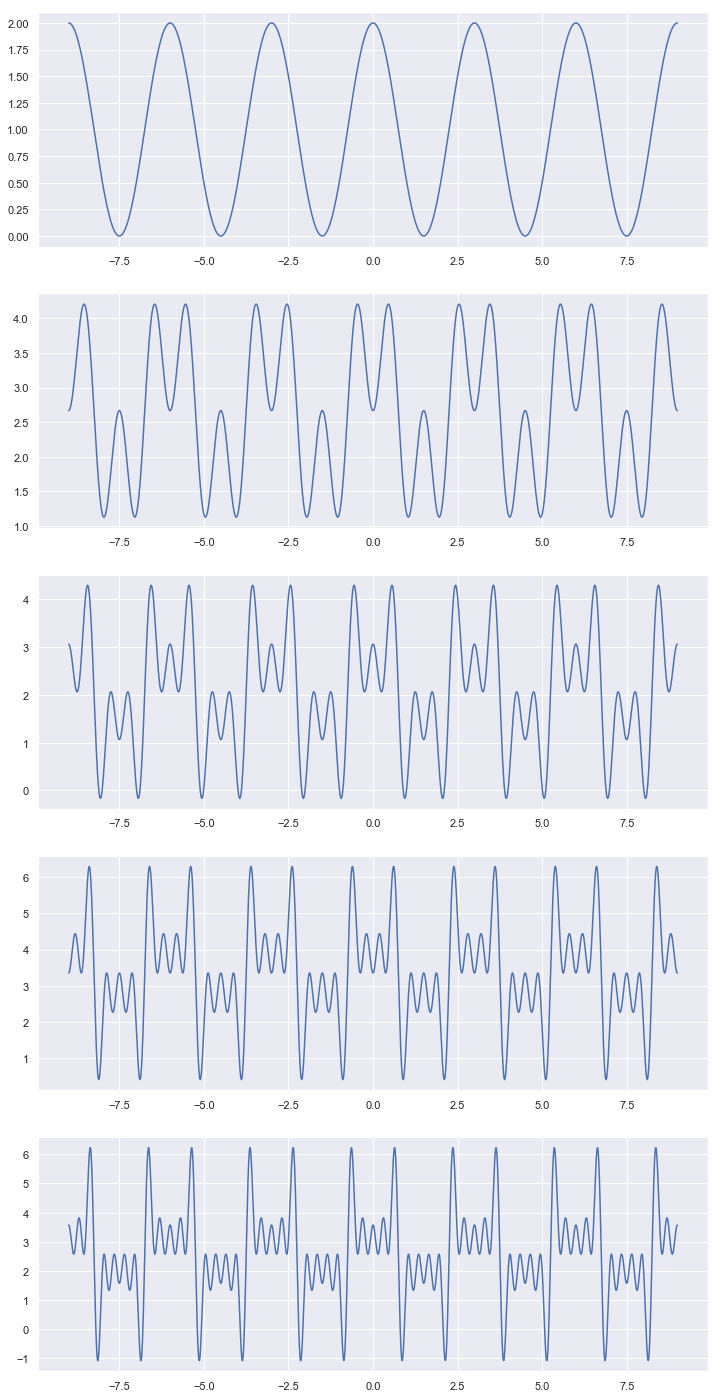

In [36]:

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 5 * 5))
y=0
for i, n in enumerate(range(1,10,2)):
    ax=axs[i]
    y+=(2/(n*np.pi))*np.pi-np.sin(n*np.pi/2)- np.power(np.sin(n*np.pi/2)*(-1),n) * np.sin(n*2*np.pi*t/3+np.pi/2)
    ax.plot(t,y)


# References

[1] 	J. G. Proakis, D. G. Manolakis, "Digital signal processing (3rd ed.): principles, algorithms, and applications". Prentice-Hall. ISBN:0-13-373762-4